In [262]:
# Importing dependencies
import numpy as np
import pandas as pd
import json
import datetime
from datetime import datetime
import time
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime

# Load data

In [263]:
path = '/Users/louis/Documents/Snips/snips_test/challenge_data/stations_data/paris_weather_20150831_20151130.jsonr'
# open and read json
raw_file = open(path).read()
# load json
raw_json = json.loads(raw_file)

In [264]:
# select only data 
meteo_data = [el['data'] for el in raw_json]
#create dataframe
data = pd.DataFrame(meteo_data)

# Clean and convert dates

In [140]:
# ----- DATES
# Method that takes a hash as input and returns a '%Y-%m-%d %H:%M:%S' formatted date
def clean_date(date_hash):
    ymd = '-'.join((date_hash['year'], date_hash['mon'], date_hash['mday']))
    hms = ':'.join((date_hash['hour'], date_hash['min'], '00'))
    date = ymd + ' ' + hms
    return datetime.strptime(date, '%Y-%m-%d %H:%M:%S')

# clean column utcdate
data['utcdate'] = data['utcdate'].map(clean_date)

In [133]:
date = data.loc[0,'utcdate']
date = datetime.strptime(date, '%Y-%m-%d %H:%M:%S')
print type(date)

<type 'datetime.datetime'>


In [191]:
# ----- WIND SPEED
data['wspdm'] = data['wspdm'].map(lambda x: float(x))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4416 entries, 0 to 4415
Data columns (total 32 columns):
conds         4416 non-null object
date          4416 non-null object
dewpti        4416 non-null object
dewptm        4416 non-null object
fog           4416 non-null object
hail          4416 non-null object
heatindexi    4416 non-null object
heatindexm    4416 non-null object
hum           4416 non-null object
icon          4416 non-null object
metar         4416 non-null object
precipi       4416 non-null object
precipm       4416 non-null object
pressurei     4416 non-null object
pressurem     4416 non-null object
rain          4416 non-null object
snow          4416 non-null object
tempi         4416 non-null object
tempm         4416 non-null object
thunder       4416 non-null object
tornado       4416 non-null object
utcdate       4416 non-null datetime64[ns]
visi          4416 non-null object
vism          4416 non-null object
wdird         4416 non-null object
wdire     

In [144]:
data.columns.values

array([u'conds', u'date', u'dewpti', u'dewptm', u'fog', u'hail',
       u'heatindexi', u'heatindexm', u'hum', u'icon', u'metar', u'precipi',
       u'precipm', u'pressurei', u'pressurem', u'rain', u'snow', u'tempi',
       u'tempm', u'thunder', u'tornado', u'utcdate', u'visi', u'vism',
       u'wdird', u'wdire', u'wgusti', u'wgustm', u'windchilli',
       u'windchillm', u'wspdi', u'wspdm'], dtype=object)

# Check timespan and location

In [204]:
timespan = data['utcdate'].max() - data['utcdate'].min()
print 'timespan : %s' %timespan

timespan : 91 days 22:30:00


In [216]:
array_loc = [el['tzname'] for el in data.loc[:,'date']]
array_loc.count(array_loc[0]) == len(array_loc)
print 'all the dataset is only in Paris'

all the dataset is only in Paris


In [261]:
print 'max date --> %s' %data['utcdate'].max()
print 'min date --> %s' %data['utcdate'].min()

max date --> 2015-11-30 22:30:00
min date --> 2015-08-31 00:00:00


# Check if conditions makes sense

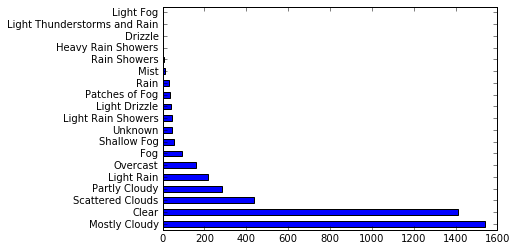

In [153]:
data['conds'].value_counts(dropna = False).plot(kind='barh')

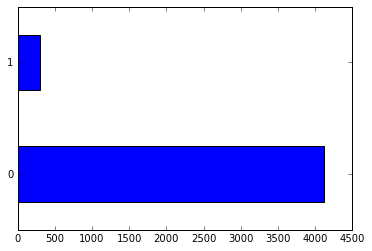

In [154]:
data['rain'].value_counts(dropna=False).plot(kind='barh')

In [182]:
data['snow'].value_counts(dropna=False)
print'il ne neige jamais'

il ne neige jamais


In [181]:
data['precipm'].value_counts(dropna = False)
print "les précipitations n'ont pas de sens"

les précipitations n'ont pas de sens


In [190]:
data['wspdm'].value_counts(dropna = False)
#print 'vitesse du vent potentiellement une feature'

11.1    547
9.3     543
5.6     399
13.0    391
14.8    380
7.4     379
3.7     324
16.7    295
18.5    256
20.4    181
0.0     162
22.2    157
24.1    107
1.9      78
25.9     77
27.8     60
29.6     34
31.5     25
33.3     10
35.2      6
38.9      3
44.4      1
37.0      1
Name: wspdm, dtype: int64

In [188]:
data['windchillm'].value_counts(dropna = False)
print 'windchillm is mostly equal to 999, hence can be discarded'

windchillm is mostly equal to 999, hence can be discarded


In [199]:
pivot1 = pd.pivot_table(data, index = ['conds', 'rain'], values = ['wspdm'], aggfunc=np.mean)
#pivot2 = pd.pivot_table(data, index = ['conds'], columns = ['wspdm'], aggfunc=np.mean)
#pivot = pd.concat([pivot1, pivot2], axis = 1)
#pivot = data.groupby(['conds','rain']).count().iloc[:,1]
print pivot1

                                       wspdm
conds                        rain           
Clear                        0     11.215004
Drizzle                      0      5.600000
Fog                          0      6.819565
Heavy Rain Showers           1     10.500000
Light Drizzle                0     15.260526
                             1     26.400000
Light Fog                    0      5.600000
Light Rain                   1     14.514815
Light Rain Showers           1     18.909302
Light Thunderstorms and Rain 1     11.100000
Mist                         0      6.025000
Mostly Cloudy                0     13.281104
Overcast                     0     13.086076
Partly Cloudy                0     10.431930
Patches of Fog               0      2.551429
Rain                         1     14.071875
Rain Showers                 1     18.160000
Scattered Clouds             0     13.722426
Shallow Fog                  0      3.651786
Unknown                      0      6.200000


In [219]:
data.columns.values

array([u'conds', u'date', u'dewpti', u'dewptm', u'fog', u'hail',
       u'heatindexi', u'heatindexm', u'hum', u'icon', u'metar', u'precipi',
       u'precipm', u'pressurei', u'pressurem', u'rain', u'snow', u'tempi',
       u'tempm', u'thunder', u'tornado', u'utcdate', u'visi', u'vism',
       u'wdird', u'wdire', u'wgusti', u'wgustm', u'windchilli',
       u'windchillm', u'wspdi', u'wspdm'], dtype=object)

# Resample dataset

In [227]:
# select a sub set of the dataframe
wind_speed = data.loc[:, ['wspdm', 'utcdate']]

In [229]:
# Set utcdate as index
wind_speed.set_index('utcdate', inplace = True)

In [230]:
wind_speed.head()

,wspdm
utcdate,
2015-08-31 00:00:00,3.7
2015-08-31 00:30:00,3.7
2015-08-31 01:00:00,0.0
2015-08-31 01:30:00,5.6
2015-08-31 02:00:00,5.6


In [234]:
# you can either resample at a higher level of granulatity and hence need to aggregate (downsample)
wind_speed_downsample = wind_speed.resample('60Min').mean()


In [235]:
wind_speed_downsample.head()

,wspdm
utcdate,
2015-08-31 00:00:00,3.70
2015-08-31 01:00:00,2.80
2015-08-31 02:00:00,4.65
2015-08-31 03:00:00,2.80
2015-08-31 04:00:00,7.40


In [254]:
# Or resample at a lower level of granularity and hence extrapolate missing values (or leave NaNs)
wind_speed_upsample = wind_speed.resample('15Min') #leaving NaNs

In [257]:
data.columns.values

array([u'conds', u'date', u'dewpti', u'dewptm', u'fog', u'hail',
       u'heatindexi', u'heatindexm', u'hum', u'icon', u'metar', u'precipi',
       u'precipm', u'pressurei', u'pressurem', u'rain', u'snow', u'tempi',
       u'tempm', u'thunder', u'tornado', u'utcdate', u'visi', u'vism',
       u'wdird', u'wdire', u'wgusti', u'wgustm', u'windchilli',
       u'windchillm', u'wspdi', u'wspdm'], dtype=object)

In [271]:
data['heatindexi'].value_counts(dropna = False)

-9999    4406
82.3        4
83.9        3
81.5        2
83.4        1
Name: heatindexi, dtype: int64

## 